In [1]:
import numpy
import os
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from python_speech_features import mfcc
from python_speech_features.base import delta
import warnings
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
import pickle as pk
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
# from sklearn.hmm import GaussianMixture

Using TensorFlow backend.


# Pickle files

In [174]:
def picklevar(filename, varname):
    file = open('./pickled\\' + filename, 'wb')
    pk.dump(varname, file)
    file.close()

In [114]:
picklevar('clf_svm_C5gamma0.1.pkl',clf_svm)

# Extract Audio Features

In [6]:
def extract_features(audio_data, samplerate):
    mfcc_features = []
    hamming_window = numpy.hamming(400)
    if (len(audio_data.shape) > 1):
        audio_data = audio_data[:,0]
    for i in range(0,audio_data.shape[0]-400,240):
        trimmed = audio_data[i:i+400]
        hammed = numpy.multiply(hamming_window, trimmed)
        mfcced = mfcc(hammed,samplerate, nfft = 2048)
        mfcc_features.append(mfcced[0])
    delta_features = delta(mfcc_features, 1)
    return mfcc_features, delta_features

# Testing

In [ ]:
def testing(filename, clf):
    mfcc_features = []
    delta_features = []
    test_English = []
    #data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Sur.flac")
    data, samplerate = sf.read(filename)
    print(data.shape)
    print(samplerate)
    if(len(data.shape) > 1):
        data = data[:,0]
    mfcc_features, delta_features = extract_features(data, samplerate)
    test_English = numpy.concatenate((mfcc_features,delta_features),axis = 1)
    test_English = preprocessing.normalize(test_English)
    results = clf.predict(test_English)
    print(results)
    print(sum(results))
    print("English Accuracy:")
    print(1-sum(results)/len(test_English))
    print("Hindi Accuracy:")
    print(sum(results)/len(test_English))

# Confusion Matrix

In [ ]:
def confusion_matrix1(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# ROC Curve

In [232]:
def plot_roc_curve_multi_class(coordinates, labels, num_classes, classifier):
    fpr = dict()
    tpr = dict()
    area_under_curve = dict()
    y = label_binarize(labels, classes=[0, 1, 2, 3, 4, 5])
    x_train, x_test, y_train, y_test = train_test_split(coordinates, y, test_size = 0.2)
    classifier = OneVsRestClassifier(classifier)
    classifier.fit(x_train, y_train)
    y_score = classifier.predict_proba(x_test)
#     fpr, tpr, thresholds = roc_curve(y_true, y_score)
#     area_under_curve = auc(fpr, tpr)
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        area_under_curve[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    area_under_curve["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    plt.figure()
    lw = 2
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f)' % area_under_curve[i])

        plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
#Reference taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html  


In [8]:
# english_mfcc_features = []
# english_delta_features = []
# english_features = []
# num_iterations = 0
# for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Me_English\\"):
#     audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Me_English\\" + file)
#     print(file, samplerate)
#     audio_mfcc, audio_delta = extract_features(audio_data, samplerate)
#     english_mfcc_features.extend(audio_mfcc)
#     english_delta_features.extend(audio_delta)
#     num_iterations+=1

meE1.flac 48000
meE10.flac 48000
meE2.flac 48000
meE3.flac 48000
meE4.flac 48000
meE5.flac 48000
meE6.flac 48000
meE7.flac 48000
meE8.flac 48000
meE9.flac 48000


In [10]:
# hindi_mfcc_features = []
# hindi_delta_features = []
# hindi_features = []
# num_iterations = 0
# for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Me_Hindi\\"):
#     audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Me_Hindi\\" + file)
#     hamming_window = numpy.hamming(400)
#     print(file, samplerate)
#     audio_mfcc, audio_delta = extract_features(audio_data, samplerate)
#     hindi_mfcc_features.extend(audio_mfcc)
#     hindi_delta_features.extend(audio_delta)
#     num_iterations+=1

meH1.flac 48000
meH2.flac 48000
meH3.flac 48000
meH4.flac 48000
meH5.flac 48000


In [11]:
# print(len(hindi_mfcc_features), len(hindi_delta_features))
# print(len(english_mfcc_features), len(english_delta_features))
# if (len(hindi_mfcc_features) != len(hindi_delta_features)):
#     print("PROBLEM")

12003 12003
13274 13274


In [12]:
# zeros = [0]*len(english_mfcc_features)
# english_mfcc_features = numpy.array(english_mfcc_features)
# english_delta_features = numpy.array(english_delta_features)
# x_English = numpy.concatenate((english_mfcc_features, english_delta_features), axis = 1)

# ones = [1]*len(hindi_mfcc_features)
# hindi_mfcc_features = numpy.array(hindi_mfcc_features)
# hindi_delta_features = numpy.array(hindi_delta_features)
# x_Hindi = numpy.concatenate((hindi_mfcc_features, hindi_delta_features),axis = 1)

# X = numpy.concatenate((x_English, x_Hindi), axis=0)
# Y = numpy.concatenate((zeros, ones), axis=0)
# normalized_X = preprocessing.normalize(X)

# Classifiers

# Feed Forward Neural Network Keras


In [145]:
X=x_train
Y=y_train
model = Sequential()
model.add(Dense(100, input_dim=26, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
# Fit the model
Y = to_categorical(Y)
model.fit(X, Y, epochs=40, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

Epoch 1/40


 31700/175968 [====>.........................] - ETA: 6:15:16 - loss: 1.7831 - categorical_accuracy: 0.100 - ETA: 13:55 - loss: 1.7912 - categorical_accuracy: 0.2036  - ETA: 9:38 - loss: 1.7900 - categorical_accuracy: 0.192 - ETA: 6:59 - loss: 1.7882 - categorical_accuracy: 0.19 - ETA: 5:38 - loss: 1.7896 - categorical_accuracy: 0.17 - ETA: 4:29 - loss: 1.7867 - categorical_accuracy: 0.18 - ETA: 3:49 - loss: 1.7816 - categorical_accuracy: 0.19 - ETA: 3:22 - loss: 1.7805 - categorical_accuracy: 0.19 - ETA: 3:04 - loss: 1.7763 - categorical_accuracy: 0.19 - ETA: 2:46 - loss: 1.7702 - categorical_accuracy: 0.20 - ETA: 2:34 - loss: 1.7641 - categorical_accuracy: 0.21 - ETA: 2:23 - loss: 1.7588 - categorical_accuracy: 0.21 - ETA: 2:15 - loss: 1.7572 - categorical_accuracy: 0.21 - ETA: 2:07 - loss: 1.7509 - categorical_accuracy: 0.22 - ETA: 2:00 - loss: 1.7431 - categorical_accuracy: 0.23 - ETA: 1:56 - loss: 1.7375 - categorical_accuracy: 0.23 - ETA: 1:50 - loss: 1.7318 - categorical_accurac

175968/175968 [==============================] - ETA: 6s - loss: 1.4567 - categorical_accuracy: 0.41 - ETA: 6s - loss: 1.4566 - categorical_accuracy: 0.41 - ETA: 6s - loss: 1.4566 - categorical_accuracy: 0.41 - ETA: 6s - loss: 1.4566 - categorical_accuracy: 0.41 - ETA: 6s - loss: 1.4565 - categorical_accuracy: 0.41 - ETA: 6s - loss: 1.4563 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4562 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4560 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4560 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4558 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4557 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4556 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4554 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4553 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4551 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4551 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4549 - categorical_accuracy: 0.41 - ETA: 5s - loss: 1.4547 - categori

 28950/175968 [===>..........................] - ETA: 9:22 - loss: 2.0394 - categorical_accuracy: 0.10 - ETA: 1:07 - loss: 1.3638 - categorical_accuracy: 0.48 - ETA: 56s - loss: 1.3420 - categorical_accuracy: 0.4881 - ETA: 50s - loss: 1.3184 - categorical_accuracy: 0.498 - ETA: 50s - loss: 1.3228 - categorical_accuracy: 0.502 - ETA: 50s - loss: 1.3388 - categorical_accuracy: 0.484 - ETA: 48s - loss: 1.3357 - categorical_accuracy: 0.488 - ETA: 47s - loss: 1.3358 - categorical_accuracy: 0.484 - ETA: 46s - loss: 1.3423 - categorical_accuracy: 0.481 - ETA: 45s - loss: 1.3511 - categorical_accuracy: 0.475 - ETA: 44s - loss: 1.3652 - categorical_accuracy: 0.466 - ETA: 43s - loss: 1.3686 - categorical_accuracy: 0.463 - ETA: 43s - loss: 1.3689 - categorical_accuracy: 0.462 - ETA: 43s - loss: 1.3730 - categorical_accuracy: 0.460 - ETA: 42s - loss: 1.3753 - categorical_accuracy: 0.458 - ETA: 42s - loss: 1.3634 - categorical_accuracy: 0.466 - ETA: 41s - loss: 1.3587 - categorical_accuracy: 0.467 

167750/175968 [===========================>..] - ETA: 10s - loss: 1.3267 - categorical_accuracy: 0.478 - ETA: 9s - loss: 1.3265 - categorical_accuracy: 0.478 - ETA: 9s - loss: 1.3266 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3266 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3266 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3266 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3266 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3266 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3267 - categorical_accuracy: 0.47 - ETA: 9s - loss: 1.3266 - categ

175968/175968 [==============================] - ETA: 2s - loss: 1.3227 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.3226 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.3225 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3224 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3224 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3223 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3224 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3225 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3225 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3225 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3224 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3224 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3223 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3223 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3223 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3221 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3221 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.3222 - categori

 28740/175968 [===>..........................] - ETA: 7:02 - loss: 1.6789 - categorical_accuracy: 0.20 - ETA: 1:00 - loss: 1.1653 - categorical_accuracy: 0.54 - ETA: 53s - loss: 1.2437 - categorical_accuracy: 0.5024 - ETA: 50s - loss: 1.2676 - categorical_accuracy: 0.504 - ETA: 48s - loss: 1.2698 - categorical_accuracy: 0.508 - ETA: 47s - loss: 1.2737 - categorical_accuracy: 0.501 - ETA: 48s - loss: 1.2760 - categorical_accuracy: 0.498 - ETA: 49s - loss: 1.2710 - categorical_accuracy: 0.500 - ETA: 48s - loss: 1.2838 - categorical_accuracy: 0.493 - ETA: 48s - loss: 1.2718 - categorical_accuracy: 0.497 - ETA: 47s - loss: 1.2669 - categorical_accuracy: 0.500 - ETA: 47s - loss: 1.2785 - categorical_accuracy: 0.494 - ETA: 47s - loss: 1.2744 - categorical_accuracy: 0.498 - ETA: 46s - loss: 1.2723 - categorical_accuracy: 0.498 - ETA: 46s - loss: 1.2698 - categorical_accuracy: 0.498 - ETA: 45s - loss: 1.2653 - categorical_accuracy: 0.500 - ETA: 45s - loss: 1.2666 - categorical_accuracy: 0.500 

158370/175968 [=========================>....] - ETA: 11s - loss: 1.2752 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2751 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2750 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2750 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2750 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2749 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2750 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2749 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2749 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2750 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2751 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2751 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2751 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2752 - categorical_accuracy: 0.501 - ETA: 11s - loss: 1.2752 - categorical_accuracy: 0.501 - ETA: 10s - loss: 1.2751 - categorical_accuracy: 0.501 - ETA: 10s - loss: 1.2751 - categorical_accuracy: 0.501 -

175968/175968 [==============================] - ETA: 5s - loss: 1.2741 - categorical_accuracy: 0.50 - ETA: 5s - loss: 1.2741 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2741 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2739 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2740 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2740 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2740 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2739 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2738 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2738 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2737 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2736 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2736 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2736 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2735 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2735 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2736 - categorical_accuracy: 0.50 - ETA: 4s - loss: 1.2737 - categori

 33770/175968 [====>.........................] - ETA: 7:01 - loss: 1.4112 - categorical_accuracy: 0.20 - ETA: 1:06 - loss: 1.2405 - categorical_accuracy: 0.53 - ETA: 56s - loss: 1.2220 - categorical_accuracy: 0.5225 - ETA: 51s - loss: 1.2536 - categorical_accuracy: 0.508 - ETA: 50s - loss: 1.2543 - categorical_accuracy: 0.517 - ETA: 50s - loss: 1.2327 - categorical_accuracy: 0.528 - ETA: 50s - loss: 1.2362 - categorical_accuracy: 0.526 - ETA: 51s - loss: 1.2284 - categorical_accuracy: 0.529 - ETA: 52s - loss: 1.2329 - categorical_accuracy: 0.528 - ETA: 52s - loss: 1.2303 - categorical_accuracy: 0.529 - ETA: 52s - loss: 1.2271 - categorical_accuracy: 0.529 - ETA: 52s - loss: 1.2176 - categorical_accuracy: 0.530 - ETA: 52s - loss: 1.2265 - categorical_accuracy: 0.525 - ETA: 51s - loss: 1.2288 - categorical_accuracy: 0.519 - ETA: 50s - loss: 1.2303 - categorical_accuracy: 0.519 - ETA: 49s - loss: 1.2292 - categorical_accuracy: 0.518 - ETA: 49s - loss: 1.2232 - categorical_accuracy: 0.522 

166520/175968 [===========================>..] - ETA: 9s - loss: 1.2414 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2415 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2417 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2416 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2417 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2416 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2416 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2417 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2415 - categorical_accuracy: 0.51 - ETA: 9s - loss: 1.2414 - categorical_accuracy: 0.51 - ETA: 8s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 8s - loss: 1.2414 - categorical_accuracy: 0.51 - ETA: 8s - loss: 1.2414 - categorical_accuracy: 0.51 - ETA: 8s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 8s - loss: 1.2414 - categorical_accuracy: 0.51 - ETA: 8s - loss: 1.2415 - categorical_accuracy: 0.51 - ETA: 8s - loss: 1.2415 - categorical_accuracy: 0.51 - ETA: 8s - loss: 1.2415 - categori

175968/175968 [==============================] - ETA: 2s - loss: 1.2410 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2410 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2411 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2411 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2410 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2411 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2411 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2412 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2412 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2412 - categorical_accuracy: 0.51 - ETA: 2s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 1s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 1s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 1s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 1s - loss: 1.2413 - categorical_accuracy: 0.51 - ETA: 1s - loss: 1.2412 - categori

 30290/175968 [====>.........................] - ETA: 9:22 - loss: 1.0595 - categorical_accuracy: 0.60 - ETA: 1:03 - loss: 1.2178 - categorical_accuracy: 0.56 - ETA: 53s - loss: 1.2190 - categorical_accuracy: 0.5409 - ETA: 50s - loss: 1.2145 - categorical_accuracy: 0.535 - ETA: 49s - loss: 1.2198 - categorical_accuracy: 0.523 - ETA: 47s - loss: 1.2214 - categorical_accuracy: 0.522 - ETA: 47s - loss: 1.2129 - categorical_accuracy: 0.527 - ETA: 46s - loss: 1.2104 - categorical_accuracy: 0.523 - ETA: 45s - loss: 1.2100 - categorical_accuracy: 0.526 - ETA: 43s - loss: 1.2282 - categorical_accuracy: 0.516 - ETA: 43s - loss: 1.2317 - categorical_accuracy: 0.517 - ETA: 43s - loss: 1.2208 - categorical_accuracy: 0.520 - ETA: 43s - loss: 1.2118 - categorical_accuracy: 0.527 - ETA: 44s - loss: 1.2144 - categorical_accuracy: 0.525 - ETA: 44s - loss: 1.2142 - categorical_accuracy: 0.526 - ETA: 44s - loss: 1.2151 - categorical_accuracy: 0.526 - ETA: 43s - loss: 1.2135 - categorical_accuracy: 0.524 

175968/175968 [==============================] - ETA: 5s - loss: 1.2192 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2191 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2191 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2192 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2191 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2191 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2192 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2190 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2190 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2190 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2188 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2189 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2189 - categorical_accuracy: 0.52 - ETA: 5s - loss: 1.2189 - categorical_accuracy: 0.52 - ETA: 4s - loss: 1.2189 - categorical_accuracy: 0.52 - ETA: 4s - loss: 1.2189 - categorical_accuracy: 0.52 - ETA: 4s - loss: 1.2188 - categorical_accuracy: 0.52 - ETA: 4s - loss: 1.2187 - categori

 30700/175968 [====>.........................] - ETA: 7:54 - loss: 1.2194 - categorical_accuracy: 0.60 - ETA: 59s - loss: 1.2417 - categorical_accuracy: 0.5043 - ETA: 55s - loss: 1.2160 - categorical_accuracy: 0.522 - ETA: 50s - loss: 1.1956 - categorical_accuracy: 0.541 - ETA: 47s - loss: 1.1974 - categorical_accuracy: 0.531 - ETA: 45s - loss: 1.2053 - categorical_accuracy: 0.538 - ETA: 44s - loss: 1.2023 - categorical_accuracy: 0.539 - ETA: 44s - loss: 1.2120 - categorical_accuracy: 0.533 - ETA: 44s - loss: 1.2063 - categorical_accuracy: 0.531 - ETA: 43s - loss: 1.2039 - categorical_accuracy: 0.531 - ETA: 43s - loss: 1.2102 - categorical_accuracy: 0.534 - ETA: 43s - loss: 1.2055 - categorical_accuracy: 0.535 - ETA: 43s - loss: 1.2003 - categorical_accuracy: 0.537 - ETA: 42s - loss: 1.1958 - categorical_accuracy: 0.541 - ETA: 42s - loss: 1.2028 - categorical_accuracy: 0.534 - ETA: 42s - loss: 1.2063 - categorical_accuracy: 0.531 - ETA: 41s - loss: 1.2066 - categorical_accuracy: 0.532 

175968/175968 [==============================] - ETA: 7s - loss: 1.2015 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2015 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2015 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2015 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2016 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2017 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2017 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2017 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2017 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2016 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2016 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2014 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2014 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2012 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2012 - categorical_accuracy: 0.53 - ETA: 7s - loss: 1.2012 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.2013 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.2013 - categori

 30380/175968 [====>.........................] - ETA: 8:12 - loss: 1.2061 - categorical_accuracy: 0.60 - ETA: 54s - loss: 1.2010 - categorical_accuracy: 0.5231 - ETA: 45s - loss: 1.2017 - categorical_accuracy: 0.542 - ETA: 44s - loss: 1.2077 - categorical_accuracy: 0.534 - ETA: 42s - loss: 1.1968 - categorical_accuracy: 0.534 - ETA: 42s - loss: 1.2026 - categorical_accuracy: 0.535 - ETA: 46s - loss: 1.2107 - categorical_accuracy: 0.530 - ETA: 45s - loss: 1.2132 - categorical_accuracy: 0.527 - ETA: 45s - loss: 1.2023 - categorical_accuracy: 0.534 - ETA: 44s - loss: 1.1919 - categorical_accuracy: 0.540 - ETA: 44s - loss: 1.2000 - categorical_accuracy: 0.536 - ETA: 44s - loss: 1.1997 - categorical_accuracy: 0.535 - ETA: 44s - loss: 1.1968 - categorical_accuracy: 0.535 - ETA: 43s - loss: 1.1967 - categorical_accuracy: 0.534 - ETA: 44s - loss: 1.1902 - categorical_accuracy: 0.537 - ETA: 44s - loss: 1.1868 - categorical_accuracy: 0.539 - ETA: 43s - loss: 1.1928 - categorical_accuracy: 0.537 

175968/175968 [==============================] - ETA: 6s - loss: 1.1874 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1875 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1875 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1876 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1875 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1875 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1876 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1875 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1875 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1876 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1876 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1876 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1877 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1877 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1878 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1878 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1878 - categorical_accuracy: 0.53 - ETA: 6s - loss: 1.1877 - categori

Epoch 8/40


 28440/175968 [===>..........................] - ETA: 8:12 - loss: 1.7704 - categorical_accuracy: 0.50 - ETA: 55s - loss: 1.3986 - categorical_accuracy: 0.4960 - ETA: 57s - loss: 1.3407 - categorical_accuracy: 0.510 - ETA: 57s - loss: 1.2974 - categorical_accuracy: 0.507 - ETA: 59s - loss: 1.2764 - categorical_accuracy: 0.501 - ETA: 59s - loss: 1.2454 - categorical_accuracy: 0.509 - ETA: 1:00 - loss: 1.2451 - categorical_accuracy: 0.51 - ETA: 1:01 - loss: 1.2321 - categorical_accuracy: 0.51 - ETA: 1:00 - loss: 1.2357 - categorical_accuracy: 0.51 - ETA: 59s - loss: 1.2199 - categorical_accuracy: 0.5205 - ETA: 59s - loss: 1.2090 - categorical_accuracy: 0.523 - ETA: 57s - loss: 1.2108 - categorical_accuracy: 0.523 - ETA: 57s - loss: 1.2168 - categorical_accuracy: 0.522 - ETA: 56s - loss: 1.2102 - categorical_accuracy: 0.529 - ETA: 56s - loss: 1.2080 - categorical_accuracy: 0.531 - ETA: 55s - loss: 1.2093 - categorical_accuracy: 0.530 - ETA: 54s - loss: 1.2059 - categorical_accuracy: 0.532

175968/175968 [==============================] - ETA: 7s - loss: 1.1752 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1753 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1753 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1753 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1752 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1753 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1754 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1755 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1755 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1756 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1756 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1756 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1757 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1756 - categorical_accuracy: 0.54 - ETA: 7s - loss: 1.1756 - categorical_accuracy: 0.54 - ETA: 6s - loss: 1.1757 - categorical_accuracy: 0.54 - ETA: 6s - loss: 1.1757 - categorical_accuracy: 0.54 - ETA: 6s - loss: 1.1758 - categori

 31410/175968 [====>.........................] - ETA: 6:26 - loss: 1.1213 - categorical_accuracy: 0.50 - ETA: 54s - loss: 1.1168 - categorical_accuracy: 0.5750 - ETA: 47s - loss: 1.1459 - categorical_accuracy: 0.557 - ETA: 44s - loss: 1.1144 - categorical_accuracy: 0.566 - ETA: 43s - loss: 1.1105 - categorical_accuracy: 0.566 - ETA: 43s - loss: 1.1014 - categorical_accuracy: 0.569 - ETA: 42s - loss: 1.1089 - categorical_accuracy: 0.567 - ETA: 42s - loss: 1.1220 - categorical_accuracy: 0.564 - ETA: 41s - loss: 1.1180 - categorical_accuracy: 0.561 - ETA: 41s - loss: 1.1259 - categorical_accuracy: 0.555 - ETA: 41s - loss: 1.1326 - categorical_accuracy: 0.551 - ETA: 40s - loss: 1.1389 - categorical_accuracy: 0.550 - ETA: 40s - loss: 1.1473 - categorical_accuracy: 0.545 - ETA: 40s - loss: 1.1443 - categorical_accuracy: 0.547 - ETA: 41s - loss: 1.1466 - categorical_accuracy: 0.550 - ETA: 41s - loss: 1.1467 - categorical_accuracy: 0.550 - ETA: 41s - loss: 1.1383 - categorical_accuracy: 0.551 

175968/175968 [==============================] - ETA: 5s - loss: 1.1637 - categorical_accuracy: 0.54 - ETA: 5s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 5s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 5s - loss: 1.1637 - categorical_accuracy: 0.54 - ETA: 5s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 5s - loss: 1.1635 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1635 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1637 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1635 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1635 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1636 - categorical_accuracy: 0.54 - ETA: 4s - loss: 1.1636 - categori

 26280/175968 [===>..........................] - ETA: 7:02 - loss: 1.0585 - categorical_accuracy: 0.60 - ETA: 1:22 - loss: 1.1358 - categorical_accuracy: 0.52 - ETA: 1:07 - loss: 1.1006 - categorical_accuracy: 0.55 - ETA: 56s - loss: 1.1172 - categorical_accuracy: 0.5564 - ETA: 57s - loss: 1.1265 - categorical_accuracy: 0.557 - ETA: 56s - loss: 1.1247 - categorical_accuracy: 0.554 - ETA: 54s - loss: 1.1238 - categorical_accuracy: 0.553 - ETA: 52s - loss: 1.1090 - categorical_accuracy: 0.567 - ETA: 53s - loss: 1.1263 - categorical_accuracy: 0.562 - ETA: 52s - loss: 1.1374 - categorical_accuracy: 0.559 - ETA: 52s - loss: 1.1434 - categorical_accuracy: 0.558 - ETA: 52s - loss: 1.1533 - categorical_accuracy: 0.555 - ETA: 52s - loss: 1.1550 - categorical_accuracy: 0.555 - ETA: 51s - loss: 1.1577 - categorical_accuracy: 0.554 - ETA: 51s - loss: 1.1473 - categorical_accuracy: 0.559 - ETA: 51s - loss: 1.1572 - categorical_accuracy: 0.553 - ETA: 50s - loss: 1.1615 - categorical_accuracy: 0.549 

168120/175968 [===========================>..] - ETA: 10s - loss: 1.1522 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1520 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1519 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1519 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1519 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1519 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1519 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1520 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1521 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1521 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1522 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1520 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1521 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1521 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1521 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1520 - categorical_accuracy: 0.554 - ETA: 10s - loss: 1.1521 - categorical_accuracy: 0.554 -

175968/175968 [==============================] - ETA: 2s - loss: 1.1553 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1552 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1552 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1553 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1553 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1553 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1553 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1553 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1554 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1555 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1555 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1556 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1556 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1556 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1556 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1556 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1557 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1558 - categori

 30910/175968 [====>.........................] - ETA: 7:55 - loss: 0.8513 - categorical_accuracy: 0.70 - ETA: 51s - loss: 1.1206 - categorical_accuracy: 0.5593 - ETA: 46s - loss: 1.1445 - categorical_accuracy: 0.540 - ETA: 46s - loss: 1.1097 - categorical_accuracy: 0.565 - ETA: 46s - loss: 1.1274 - categorical_accuracy: 0.560 - ETA: 44s - loss: 1.1199 - categorical_accuracy: 0.563 - ETA: 43s - loss: 1.1057 - categorical_accuracy: 0.570 - ETA: 43s - loss: 1.1044 - categorical_accuracy: 0.569 - ETA: 43s - loss: 1.1258 - categorical_accuracy: 0.560 - ETA: 42s - loss: 1.1312 - categorical_accuracy: 0.558 - ETA: 43s - loss: 1.1376 - categorical_accuracy: 0.553 - ETA: 43s - loss: 1.1444 - categorical_accuracy: 0.552 - ETA: 43s - loss: 1.1391 - categorical_accuracy: 0.551 - ETA: 42s - loss: 1.1403 - categorical_accuracy: 0.553 - ETA: 43s - loss: 1.1447 - categorical_accuracy: 0.554 - ETA: 43s - loss: 1.1367 - categorical_accuracy: 0.558 - ETA: 43s - loss: 1.1310 - categorical_accuracy: 0.561 

175968/175968 [==============================] - ETA: 5s - loss: 1.1460 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1459 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1458 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1459 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1459 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1459 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1461 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1462 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1462 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1462 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1464 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1464 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1463 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1463 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1463 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1464 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1464 - categorical_accuracy: 0.55 - ETA: 4s - loss: 1.1463 - categori

 26950/175968 [===>..........................] - ETA: 10:50 - loss: 1.0684 - categorical_accuracy: 0.600 - ETA: 1:22 - loss: 1.1576 - categorical_accuracy: 0.536 - ETA: 1:01 - loss: 1.1146 - categorical_accuracy: 0.56 - ETA: 1:03 - loss: 1.1576 - categorical_accuracy: 0.53 - ETA: 59s - loss: 1.1096 - categorical_accuracy: 0.5500 - ETA: 56s - loss: 1.1088 - categorical_accuracy: 0.560 - ETA: 55s - loss: 1.1309 - categorical_accuracy: 0.549 - ETA: 53s - loss: 1.1084 - categorical_accuracy: 0.558 - ETA: 51s - loss: 1.0929 - categorical_accuracy: 0.562 - ETA: 50s - loss: 1.1075 - categorical_accuracy: 0.561 - ETA: 48s - loss: 1.1070 - categorical_accuracy: 0.562 - ETA: 48s - loss: 1.1183 - categorical_accuracy: 0.559 - ETA: 48s - loss: 1.1223 - categorical_accuracy: 0.557 - ETA: 48s - loss: 1.1156 - categorical_accuracy: 0.561 - ETA: 48s - loss: 1.1183 - categorical_accuracy: 0.563 - ETA: 48s - loss: 1.1234 - categorical_accuracy: 0.560 - ETA: 49s - loss: 1.1247 - categorical_accuracy: 0.5

170610/175968 [============================>.] - ETA: 10s - loss: 1.1384 - categorical_accuracy: 0.559 - ETA: 10s - loss: 1.1384 - categorical_accuracy: 0.559 - ETA: 10s - loss: 1.1385 - categorical_accuracy: 0.559 - ETA: 10s - loss: 1.1385 - categorical_accuracy: 0.559 - ETA: 10s - loss: 1.1386 - categorical_accuracy: 0.559 - ETA: 9s - loss: 1.1389 - categorical_accuracy: 0.559 - ETA: 9s - loss: 1.1388 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1387 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1387 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1385 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1386 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1387 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1388 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1387 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1388 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1388 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1389 - categorical_accuracy: 0.55 - ETA: 9s - loss: 1.1390

175968/175968 [==============================] - ETA: 1s - loss: 1.1408 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1408 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1408 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1407 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1408 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1407 - categorical_accuracy: 0.55 - ETA: 1s - loss: 1.1405 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1407 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1406 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1407 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1408 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1408 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1409 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1408 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1409 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1409 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1408 - categorical_accuracy: 0.55 - ETA: 0s - loss: 1.1408 - categori

 27950/175968 [===>..........................] - ETA: 7:37 - loss: 0.9104 - categorical_accuracy: 0.60 - ETA: 1:07 - loss: 0.9912 - categorical_accuracy: 0.63 - ETA: 58s - loss: 1.0657 - categorical_accuracy: 0.6077 - ETA: 55s - loss: 1.0857 - categorical_accuracy: 0.587 - ETA: 51s - loss: 1.0924 - categorical_accuracy: 0.579 - ETA: 49s - loss: 1.0900 - categorical_accuracy: 0.580 - ETA: 48s - loss: 1.0834 - categorical_accuracy: 0.588 - ETA: 47s - loss: 1.0931 - categorical_accuracy: 0.584 - ETA: 46s - loss: 1.0994 - categorical_accuracy: 0.576 - ETA: 46s - loss: 1.1043 - categorical_accuracy: 0.574 - ETA: 45s - loss: 1.1054 - categorical_accuracy: 0.573 - ETA: 45s - loss: 1.1041 - categorical_accuracy: 0.574 - ETA: 44s - loss: 1.1003 - categorical_accuracy: 0.572 - ETA: 44s - loss: 1.0996 - categorical_accuracy: 0.574 - ETA: 44s - loss: 1.0984 - categorical_accuracy: 0.574 - ETA: 44s - loss: 1.1049 - categorical_accuracy: 0.571 - ETA: 44s - loss: 1.1024 - categorical_accuracy: 0.572 

175968/175968 [==============================] - ETA: 7s - loss: 1.1321 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1319 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1319 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1321 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1322 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1321 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1321 - categorical_accuracy: 0.56 - ETA: 7s - loss: 1.1320 - categori

 23470/175968 [===>..........................] - ETA: 15:14 - loss: 1.2945 - categorical_accuracy: 0.400 - ETA: 5:10 - loss: 1.0911 - categorical_accuracy: 0.533 - ETA: 3:09 - loss: 1.1403 - categorical_accuracy: 0.52 - ETA: 2:16 - loss: 1.1665 - categorical_accuracy: 0.53 - ETA: 2:01 - loss: 1.1534 - categorical_accuracy: 0.54 - ETA: 1:50 - loss: 1.1578 - categorical_accuracy: 0.53 - ETA: 1:52 - loss: 1.1430 - categorical_accuracy: 0.54 - ETA: 1:43 - loss: 1.1417 - categorical_accuracy: 0.55 - ETA: 1:33 - loss: 1.1446 - categorical_accuracy: 0.55 - ETA: 1:24 - loss: 1.1468 - categorical_accuracy: 0.55 - ETA: 1:18 - loss: 1.1519 - categorical_accuracy: 0.55 - ETA: 1:13 - loss: 1.1465 - categorical_accuracy: 0.56 - ETA: 1:09 - loss: 1.1522 - categorical_accuracy: 0.56 - ETA: 1:08 - loss: 1.1625 - categorical_accuracy: 0.55 - ETA: 1:08 - loss: 1.1488 - categorical_accuracy: 0.56 - ETA: 1:08 - loss: 1.1441 - categorical_accuracy: 0.56 - ETA: 1:07 - loss: 1.1408 - categorical_accuracy: 0.5

155890/175968 [=========================>....] - ETA: 15s - loss: 1.1256 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1259 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1257 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1257 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1256 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1257 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1257 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1258 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1259 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1258 - categorical_accuracy: 0.564 - ETA: 15s - loss: 1.1259 - categorical_accuracy: 0.564 - ETA: 14s - loss: 1.1259 - categorical_accuracy: 0.564 - ETA: 14s - loss: 1.1259 - categorical_accuracy: 0.564 - ETA: 14s - loss: 1.1260 - categorical_accuracy: 0.564 - ETA: 14s - loss: 1.1260 - categorical_accuracy: 0.564 - ETA: 14s - loss: 1.1259 - categorical_accuracy: 0.564 - ETA: 14s - loss: 1.1257 - categorical_accuracy: 0.564 -

175968/175968 [==============================] - ETA: 5s - loss: 1.1263 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1265 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1265 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1266 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1265 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1266 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1265 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1265 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1265 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1266 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1266 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1266 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1267 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1268 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1269 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1269 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1269 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1269 - categori

 30640/175968 [====>.........................] - ETA: 5:51 - loss: 0.9733 - categorical_accuracy: 0.80 - ETA: 54s - loss: 1.1676 - categorical_accuracy: 0.5087 - ETA: 49s - loss: 1.1297 - categorical_accuracy: 0.538 - ETA: 48s - loss: 1.1323 - categorical_accuracy: 0.539 - ETA: 48s - loss: 1.1379 - categorical_accuracy: 0.545 - ETA: 46s - loss: 1.1138 - categorical_accuracy: 0.556 - ETA: 45s - loss: 1.1208 - categorical_accuracy: 0.550 - ETA: 44s - loss: 1.1229 - categorical_accuracy: 0.554 - ETA: 43s - loss: 1.1140 - categorical_accuracy: 0.560 - ETA: 42s - loss: 1.1160 - categorical_accuracy: 0.559 - ETA: 41s - loss: 1.1181 - categorical_accuracy: 0.558 - ETA: 41s - loss: 1.1190 - categorical_accuracy: 0.559 - ETA: 41s - loss: 1.1198 - categorical_accuracy: 0.558 - ETA: 40s - loss: 1.1202 - categorical_accuracy: 0.560 - ETA: 40s - loss: 1.1168 - categorical_accuracy: 0.561 - ETA: 41s - loss: 1.1173 - categorical_accuracy: 0.558 - ETA: 40s - loss: 1.1151 - categorical_accuracy: 0.560 

175968/175968 [==============================] - ETA: 5s - loss: 1.1192 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1192 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1192 - categorical_accuracy: 0.56 - ETA: 5s - loss: 1.1193 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1193 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1194 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1194 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1195 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1196 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1195 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1196 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1196 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1197 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1199 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1198 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1199 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1199 - categorical_accuracy: 0.56 - ETA: 4s - loss: 1.1199 - categori

 31910/175968 [====>.........................] - ETA: 7:54 - loss: 0.9643 - categorical_accuracy: 0.50 - ETA: 55s - loss: 1.1109 - categorical_accuracy: 0.5520 - ETA: 46s - loss: 1.0822 - categorical_accuracy: 0.567 - ETA: 44s - loss: 1.0847 - categorical_accuracy: 0.580 - ETA: 43s - loss: 1.0648 - categorical_accuracy: 0.586 - ETA: 42s - loss: 1.0692 - categorical_accuracy: 0.588 - ETA: 42s - loss: 1.0640 - categorical_accuracy: 0.588 - ETA: 43s - loss: 1.0716 - categorical_accuracy: 0.585 - ETA: 43s - loss: 1.0801 - categorical_accuracy: 0.584 - ETA: 42s - loss: 1.0869 - categorical_accuracy: 0.584 - ETA: 41s - loss: 1.0899 - categorical_accuracy: 0.581 - ETA: 41s - loss: 1.0793 - categorical_accuracy: 0.584 - ETA: 40s - loss: 1.0775 - categorical_accuracy: 0.582 - ETA: 40s - loss: 1.0749 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.0810 - categorical_accuracy: 0.580 - ETA: 40s - loss: 1.0820 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.0816 - categorical_accuracy: 0.581 

166260/175968 [===========================>..] - ETA: 10s - loss: 1.1115 - categorical_accuracy: 0.570 - ETA: 10s - loss: 1.1115 - categorical_accuracy: 0.570 - ETA: 10s - loss: 1.1116 - categorical_accuracy: 0.570 - ETA: 10s - loss: 1.1115 - categorical_accuracy: 0.570 - ETA: 10s - loss: 1.1116 - categorical_accuracy: 0.570 - ETA: 10s - loss: 1.1116 - categorical_accuracy: 0.570 - ETA: 10s - loss: 1.1116 - categorical_accuracy: 0.570 - ETA: 10s - loss: 1.1115 - categorical_accuracy: 0.570 - ETA: 10s - loss: 1.1115 - categorical_accuracy: 0.570 - ETA: 9s - loss: 1.1114 - categorical_accuracy: 0.570 - ETA: 9s - loss: 1.1115 - categorical_accuracy: 0.57 - ETA: 9s - loss: 1.1116 - categorical_accuracy: 0.57 - ETA: 9s - loss: 1.1116 - categorical_accuracy: 0.56 - ETA: 9s - loss: 1.1116 - categorical_accuracy: 0.56 - ETA: 9s - loss: 1.1116 - categorical_accuracy: 0.57 - ETA: 9s - loss: 1.1116 - categorical_accuracy: 0.57 - ETA: 9s - loss: 1.1115 - categorical_accuracy: 0.57 - ETA: 9s - loss

175968/175968 [==============================] - ETA: 2s - loss: 1.1132 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1132 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1133 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1134 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1133 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1134 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1135 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1135 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1136 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1137 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1137 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1139 - categorical_accuracy: 0.56 - ETA: 2s - loss: 1.1140 - categorical_accuracy: 0.56 - ETA: 1s - loss: 1.1141 - categorical_accuracy: 0.56 - ETA: 1s - loss: 1.1142 - categorical_accuracy: 0.56 - ETA: 1s - loss: 1.1143 - categorical_accuracy: 0.56 - ETA: 1s - loss: 1.1143 - categorical_accuracy: 0.56 - ETA: 1s - loss: 1.1144 - categori

 30600/175968 [====>.........................] - ETA: 8:12 - loss: 1.4134 - categorical_accuracy: 0.40 - ETA: 1:00 - loss: 1.1272 - categorical_accuracy: 0.59 - ETA: 51s - loss: 1.1462 - categorical_accuracy: 0.5800 - ETA: 50s - loss: 1.1640 - categorical_accuracy: 0.566 - ETA: 51s - loss: 1.1448 - categorical_accuracy: 0.577 - ETA: 52s - loss: 1.1285 - categorical_accuracy: 0.577 - ETA: 52s - loss: 1.1336 - categorical_accuracy: 0.571 - ETA: 53s - loss: 1.1348 - categorical_accuracy: 0.567 - ETA: 53s - loss: 1.1202 - categorical_accuracy: 0.569 - ETA: 52s - loss: 1.1190 - categorical_accuracy: 0.571 - ETA: 52s - loss: 1.1227 - categorical_accuracy: 0.573 - ETA: 51s - loss: 1.1175 - categorical_accuracy: 0.576 - ETA: 51s - loss: 1.1371 - categorical_accuracy: 0.562 - ETA: 50s - loss: 1.1391 - categorical_accuracy: 0.563 - ETA: 50s - loss: 1.1373 - categorical_accuracy: 0.562 - ETA: 49s - loss: 1.1367 - categorical_accuracy: 0.562 - ETA: 49s - loss: 1.1272 - categorical_accuracy: 0.567 

175968/175968 [==============================] - ETA: 4s - loss: 1.1099 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.1099 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.1100 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.1100 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.1101 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.1101 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.1102 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.1103 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1102 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1102 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1101 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1101 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1102 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1102 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1102 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1102 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1103 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.1104 - categori

 28290/175968 [===>..........................] - ETA: 9:57 - loss: 0.9392 - categorical_accuracy: 0.60 - ETA: 1:02 - loss: 1.0614 - categorical_accuracy: 0.58 - ETA: 53s - loss: 1.0654 - categorical_accuracy: 0.5889 - ETA: 49s - loss: 1.1036 - categorical_accuracy: 0.594 - ETA: 47s - loss: 1.0943 - categorical_accuracy: 0.592 - ETA: 46s - loss: 1.0934 - categorical_accuracy: 0.581 - ETA: 45s - loss: 1.1014 - categorical_accuracy: 0.578 - ETA: 45s - loss: 1.0912 - categorical_accuracy: 0.582 - ETA: 45s - loss: 1.0803 - categorical_accuracy: 0.591 - ETA: 44s - loss: 1.0653 - categorical_accuracy: 0.592 - ETA: 45s - loss: 1.0617 - categorical_accuracy: 0.591 - ETA: 45s - loss: 1.0617 - categorical_accuracy: 0.589 - ETA: 46s - loss: 1.0625 - categorical_accuracy: 0.591 - ETA: 46s - loss: 1.0622 - categorical_accuracy: 0.591 - ETA: 46s - loss: 1.0634 - categorical_accuracy: 0.591 - ETA: 46s - loss: 1.0631 - categorical_accuracy: 0.589 - ETA: 46s - loss: 1.0603 - categorical_accuracy: 0.591 

173010/175968 [============================>.] - ETA: 9s - loss: 1.1034 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1034 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1034 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1036 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1037 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1039 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1039 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1040 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1039 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1040 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1040 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1041 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1042 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1042 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1042 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1041 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1041 - categorical_accuracy: 0.57 - ETA: 8s - loss: 1.1040 - categori

175968/175968 [==============================] - ETA: 0s - loss: 1.1057 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1057 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1057 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1058 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1058 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1057 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1059 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1059 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1058 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1058 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1059 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1060 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1060 - categorical_accuracy: 0.57 - ETA: 0s - loss: 1.1060 - categorical_accuracy: 0.57 - 46s 263us/step - loss: 1.1061 - categorical_accuracy: 0.5723
Epoch 19/40


 30230/175968 [====>.........................] - ETA: 9:40 - loss: 1.2850 - categorical_accuracy: 0.40 - ETA: 1:27 - loss: 1.1151 - categorical_accuracy: 0.55 - ETA: 1:12 - loss: 1.1269 - categorical_accuracy: 0.54 - ETA: 1:03 - loss: 1.0958 - categorical_accuracy: 0.55 - ETA: 58s - loss: 1.1169 - categorical_accuracy: 0.5592 - ETA: 55s - loss: 1.1209 - categorical_accuracy: 0.557 - ETA: 53s - loss: 1.1111 - categorical_accuracy: 0.559 - ETA: 51s - loss: 1.1070 - categorical_accuracy: 0.565 - ETA: 51s - loss: 1.1031 - categorical_accuracy: 0.567 - ETA: 50s - loss: 1.1063 - categorical_accuracy: 0.564 - ETA: 50s - loss: 1.1020 - categorical_accuracy: 0.565 - ETA: 49s - loss: 1.0975 - categorical_accuracy: 0.570 - ETA: 48s - loss: 1.0926 - categorical_accuracy: 0.574 - ETA: 48s - loss: 1.0989 - categorical_accuracy: 0.571 - ETA: 48s - loss: 1.1055 - categorical_accuracy: 0.572 - ETA: 47s - loss: 1.1043 - categorical_accuracy: 0.570 - ETA: 47s - loss: 1.1028 - categorical_accuracy: 0.570 

175968/175968 [==============================] - ETA: 6s - loss: 1.1027 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1025 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1027 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1028 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1027 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1025 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1025 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1026 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1026 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1026 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1027 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1028 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1027 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1028 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1027 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1028 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.1027 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.1028 - categori

 30550/175968 [====>.........................] - ETA: 7:02 - loss: 1.0544 - categorical_accuracy: 0.60 - ETA: 57s - loss: 1.0683 - categorical_accuracy: 0.5913 - ETA: 50s - loss: 1.0709 - categorical_accuracy: 0.588 - ETA: 47s - loss: 1.0575 - categorical_accuracy: 0.590 - ETA: 46s - loss: 1.0550 - categorical_accuracy: 0.593 - ETA: 44s - loss: 1.0573 - categorical_accuracy: 0.590 - ETA: 43s - loss: 1.0679 - categorical_accuracy: 0.588 - ETA: 42s - loss: 1.0597 - categorical_accuracy: 0.589 - ETA: 41s - loss: 1.0606 - categorical_accuracy: 0.590 - ETA: 41s - loss: 1.0606 - categorical_accuracy: 0.593 - ETA: 40s - loss: 1.0579 - categorical_accuracy: 0.591 - ETA: 39s - loss: 1.0706 - categorical_accuracy: 0.585 - ETA: 39s - loss: 1.0736 - categorical_accuracy: 0.584 - ETA: 39s - loss: 1.0768 - categorical_accuracy: 0.584 - ETA: 39s - loss: 1.0722 - categorical_accuracy: 0.585 - ETA: 38s - loss: 1.0694 - categorical_accuracy: 0.587 - ETA: 38s - loss: 1.0723 - categorical_accuracy: 0.587 

175968/175968 [==============================] - ETA: 5s - loss: 1.0982 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0982 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0981 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0982 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0983 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0982 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0982 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0982 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0981 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0982 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0981 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0981 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0981 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0982 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0983 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0983 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0984 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0984 - categori

 31630/175968 [====>.........................] - ETA: 7:37 - loss: 0.7367 - categorical_accuracy: 0.80 - ETA: 56s - loss: 1.1097 - categorical_accuracy: 0.5583 - ETA: 48s - loss: 1.0774 - categorical_accuracy: 0.589 - ETA: 46s - loss: 1.0702 - categorical_accuracy: 0.580 - ETA: 44s - loss: 1.0733 - categorical_accuracy: 0.583 - ETA: 41s - loss: 1.0650 - categorical_accuracy: 0.585 - ETA: 42s - loss: 1.0724 - categorical_accuracy: 0.586 - ETA: 41s - loss: 1.0823 - categorical_accuracy: 0.581 - ETA: 40s - loss: 1.0917 - categorical_accuracy: 0.580 - ETA: 40s - loss: 1.0854 - categorical_accuracy: 0.585 - ETA: 40s - loss: 1.0848 - categorical_accuracy: 0.584 - ETA: 40s - loss: 1.0714 - categorical_accuracy: 0.588 - ETA: 40s - loss: 1.0700 - categorical_accuracy: 0.590 - ETA: 40s - loss: 1.0713 - categorical_accuracy: 0.588 - ETA: 40s - loss: 1.0737 - categorical_accuracy: 0.585 - ETA: 40s - loss: 1.0694 - categorical_accuracy: 0.585 - ETA: 39s - loss: 1.0677 - categorical_accuracy: 0.585 

175968/175968 [==============================] - ETA: 4s - loss: 1.0921 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0921 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0920 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0919 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0921 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0920 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0921 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0922 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0922 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0923 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0923 - categorical_accuracy: 0.57 - ETA: 4s - loss: 1.0924 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.0925 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.0926 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.0926 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.0925 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.0925 - categorical_accuracy: 0.57 - ETA: 3s - loss: 1.0925 - categori

 30620/175968 [====>.........................] - ETA: 7:54 - loss: 1.6821 - categorical_accuracy: 0.30 - ETA: 59s - loss: 1.1579 - categorical_accuracy: 0.5348 - ETA: 51s - loss: 1.1133 - categorical_accuracy: 0.544 - ETA: 46s - loss: 1.1000 - categorical_accuracy: 0.558 - ETA: 44s - loss: 1.0923 - categorical_accuracy: 0.554 - ETA: 44s - loss: 1.1057 - categorical_accuracy: 0.554 - ETA: 44s - loss: 1.1060 - categorical_accuracy: 0.554 - ETA: 43s - loss: 1.1163 - categorical_accuracy: 0.553 - ETA: 43s - loss: 1.1063 - categorical_accuracy: 0.562 - ETA: 43s - loss: 1.1018 - categorical_accuracy: 0.565 - ETA: 43s - loss: 1.1018 - categorical_accuracy: 0.569 - ETA: 43s - loss: 1.1016 - categorical_accuracy: 0.568 - ETA: 42s - loss: 1.1039 - categorical_accuracy: 0.567 - ETA: 42s - loss: 1.1038 - categorical_accuracy: 0.571 - ETA: 42s - loss: 1.1093 - categorical_accuracy: 0.568 - ETA: 42s - loss: 1.1144 - categorical_accuracy: 0.566 - ETA: 42s - loss: 1.1107 - categorical_accuracy: 0.569 

175968/175968 [==============================] - ETA: 6s - loss: 1.0919 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.0918 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.0917 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.0918 - categorical_accuracy: 0.57 - ETA: 6s - loss: 1.0917 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0917 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0916 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0916 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0916 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0916 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0915 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0915 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0913 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0913 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0914 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0914 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0912 - categorical_accuracy: 0.57 - ETA: 5s - loss: 1.0912 - categori

 32110/175968 [====>.........................] - ETA: 7:02 - loss: 0.7489 - categorical_accuracy: 0.60 - ETA: 55s - loss: 1.0749 - categorical_accuracy: 0.5917 - ETA: 46s - loss: 1.0369 - categorical_accuracy: 0.627 - ETA: 44s - loss: 1.0544 - categorical_accuracy: 0.615 - ETA: 42s - loss: 1.0500 - categorical_accuracy: 0.605 - ETA: 42s - loss: 1.0449 - categorical_accuracy: 0.612 - ETA: 41s - loss: 1.0567 - categorical_accuracy: 0.600 - ETA: 40s - loss: 1.0512 - categorical_accuracy: 0.603 - ETA: 39s - loss: 1.0475 - categorical_accuracy: 0.604 - ETA: 39s - loss: 1.0610 - categorical_accuracy: 0.598 - ETA: 39s - loss: 1.0637 - categorical_accuracy: 0.596 - ETA: 39s - loss: 1.0699 - categorical_accuracy: 0.593 - ETA: 39s - loss: 1.0771 - categorical_accuracy: 0.588 - ETA: 39s - loss: 1.0779 - categorical_accuracy: 0.585 - ETA: 39s - loss: 1.0792 - categorical_accuracy: 0.583 - ETA: 39s - loss: 1.0815 - categorical_accuracy: 0.581 - ETA: 39s - loss: 1.0771 - categorical_accuracy: 0.581 

175968/175968 [==============================] - ETA: 6s - loss: 1.0865 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0867 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0867 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0868 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0867 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0867 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0866 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0867 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0869 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0868 - categori

 26710/175968 [===>..........................] - ETA: 8:12 - loss: 0.9263 - categorical_accuracy: 0.70 - ETA: 54s - loss: 0.9913 - categorical_accuracy: 0.6115 - ETA: 44s - loss: 1.0473 - categorical_accuracy: 0.590 - ETA: 43s - loss: 1.0337 - categorical_accuracy: 0.600 - ETA: 44s - loss: 1.0343 - categorical_accuracy: 0.602 - ETA: 43s - loss: 1.0655 - categorical_accuracy: 0.584 - ETA: 43s - loss: 1.0698 - categorical_accuracy: 0.578 - ETA: 43s - loss: 1.0574 - categorical_accuracy: 0.583 - ETA: 42s - loss: 1.0611 - categorical_accuracy: 0.582 - ETA: 41s - loss: 1.0687 - categorical_accuracy: 0.579 - ETA: 41s - loss: 1.0648 - categorical_accuracy: 0.582 - ETA: 41s - loss: 1.0690 - categorical_accuracy: 0.581 - ETA: 41s - loss: 1.0688 - categorical_accuracy: 0.581 - ETA: 41s - loss: 1.0666 - categorical_accuracy: 0.581 - ETA: 41s - loss: 1.0572 - categorical_accuracy: 0.584 - ETA: 41s - loss: 1.0535 - categorical_accuracy: 0.588 - ETA: 41s - loss: 1.0548 - categorical_accuracy: 0.586 

175968/175968 [==============================] - ETA: 5s - loss: 1.0837 - categorical_accuracy: 0.58 - ETA: 5s - loss: 1.0839 - categorical_accuracy: 0.58 - ETA: 5s - loss: 1.0838 - categorical_accuracy: 0.58 - ETA: 5s - loss: 1.0838 - categorical_accuracy: 0.58 - ETA: 5s - loss: 1.0837 - categorical_accuracy: 0.58 - ETA: 5s - loss: 1.0838 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0838 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0838 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0837 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0836 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0838 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0839 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0839 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0839 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0840 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0840 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0839 - categorical_accuracy: 0.58 - ETA: 4s - loss: 1.0839 - categori

 29490/175968 [====>.........................] - ETA: 9:58 - loss: 1.0901 - categorical_accuracy: 0.60 - ETA: 1:18 - loss: 1.0892 - categorical_accuracy: 0.58 - ETA: 1:01 - loss: 1.0488 - categorical_accuracy: 0.58 - ETA: 54s - loss: 1.0592 - categorical_accuracy: 0.5869 - ETA: 50s - loss: 1.0735 - categorical_accuracy: 0.578 - ETA: 48s - loss: 1.0537 - categorical_accuracy: 0.589 - ETA: 46s - loss: 1.0505 - categorical_accuracy: 0.592 - ETA: 45s - loss: 1.0516 - categorical_accuracy: 0.591 - ETA: 44s - loss: 1.0590 - categorical_accuracy: 0.594 - ETA: 44s - loss: 1.0547 - categorical_accuracy: 0.596 - ETA: 44s - loss: 1.0531 - categorical_accuracy: 0.595 - ETA: 44s - loss: 1.0487 - categorical_accuracy: 0.597 - ETA: 43s - loss: 1.0500 - categorical_accuracy: 0.596 - ETA: 43s - loss: 1.0455 - categorical_accuracy: 0.601 - ETA: 43s - loss: 1.0522 - categorical_accuracy: 0.596 - ETA: 43s - loss: 1.0518 - categorical_accuracy: 0.594 - ETA: 42s - loss: 1.0593 - categorical_accuracy: 0.593 

138460/175968 [======================>.......] - ETA: 14s - loss: 1.0773 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0773 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0772 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0773 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0773 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0773 - categorical_accuracy: 0.584 - ETA: 14s - loss: 1.0773 - categorical_accuracy: 0.584 -

155320/175968 [=========================>....] - ETA: 12s - loss: 1.0780 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0779 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0778 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0778 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0778 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0779 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0780 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0781 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0781 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0780 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0780 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0779 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0779 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0779 - categorical_accuracy: 0.584 - ETA: 12s - loss: 1.0779 - categorical_accuracy: 0.584 - ETA: 11s - loss: 1.0779 - categorical_accuracy: 0.584 - ETA: 11s - loss: 1.0780 - categorical_accuracy: 0.584 -

175968/175968 [==============================] - ETA: 7s - loss: 1.0785 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0785 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0783 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0783 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0783 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0783 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0783 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0785 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0784 - categori

 25620/175968 [===>..........................] - ETA: 11:43 - loss: 0.9053 - categorical_accuracy: 0.800 - ETA: 1:25 - loss: 1.0813 - categorical_accuracy: 0.584 - ETA: 1:14 - loss: 1.0450 - categorical_accuracy: 0.59 - ETA: 1:10 - loss: 1.0220 - categorical_accuracy: 0.60 - ETA: 1:19 - loss: 1.0349 - categorical_accuracy: 0.59 - ETA: 1:22 - loss: 1.0444 - categorical_accuracy: 0.58 - ETA: 1:15 - loss: 1.0708 - categorical_accuracy: 0.58 - ETA: 1:12 - loss: 1.0467 - categorical_accuracy: 0.59 - ETA: 1:10 - loss: 1.0364 - categorical_accuracy: 0.60 - ETA: 1:07 - loss: 1.0333 - categorical_accuracy: 0.59 - ETA: 1:06 - loss: 1.0420 - categorical_accuracy: 0.59 - ETA: 1:06 - loss: 1.0347 - categorical_accuracy: 0.59 - ETA: 1:05 - loss: 1.0398 - categorical_accuracy: 0.59 - ETA: 1:05 - loss: 1.0353 - categorical_accuracy: 0.59 - ETA: 1:05 - loss: 1.0371 - categorical_accuracy: 0.59 - ETA: 1:04 - loss: 1.0444 - categorical_accuracy: 0.59 - ETA: 1:04 - loss: 1.0429 - categorical_accuracy: 0.5

175968/175968 [==============================] - ETA: 8s - loss: 1.0750 - categorical_accuracy: 0.58 - ETA: 8s - loss: 1.0750 - categorical_accuracy: 0.58 - ETA: 8s - loss: 1.0750 - categorical_accuracy: 0.58 - ETA: 8s - loss: 1.0750 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0749 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0749 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0748 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0749 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0750 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0751 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0751 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0751 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0749 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0749 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0749 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0749 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0750 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0750 - categori

 34790/175968 [====>.........................] - ETA: 4:41 - loss: 1.1988 - categorical_accuracy: 0.70 - ETA: 39s - loss: 1.1501 - categorical_accuracy: 0.5433 - ETA: 33s - loss: 1.1200 - categorical_accuracy: 0.562 - ETA: 31s - loss: 1.1011 - categorical_accuracy: 0.566 - ETA: 29s - loss: 1.0843 - categorical_accuracy: 0.572 - ETA: 29s - loss: 1.0701 - categorical_accuracy: 0.590 - ETA: 29s - loss: 1.0651 - categorical_accuracy: 0.595 - ETA: 29s - loss: 1.0607 - categorical_accuracy: 0.596 - ETA: 29s - loss: 1.0589 - categorical_accuracy: 0.600 - ETA: 29s - loss: 1.0651 - categorical_accuracy: 0.597 - ETA: 29s - loss: 1.0689 - categorical_accuracy: 0.595 - ETA: 28s - loss: 1.0675 - categorical_accuracy: 0.591 - ETA: 28s - loss: 1.0716 - categorical_accuracy: 0.589 - ETA: 28s - loss: 1.0710 - categorical_accuracy: 0.589 - ETA: 28s - loss: 1.0612 - categorical_accuracy: 0.593 - ETA: 27s - loss: 1.0650 - categorical_accuracy: 0.592 - ETA: 28s - loss: 1.0631 - categorical_accuracy: 0.592 

175968/175968 [==============================] - ETA: 7s - loss: 1.0753 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0754 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0754 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0754 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0754 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0754 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0755 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0754 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0755 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0753 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0754 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0753 - categorical_accuracy: 0.58 - ETA: 7s - loss: 1.0752 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0753 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0752 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0753 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0754 - categorical_accuracy: 0.58 - ETA: 6s - loss: 1.0753 - categori

 32370/175968 [====>.........................] - ETA: 8:12 - loss: 1.4594 - categorical_accuracy: 0.30 - ETA: 54s - loss: 1.1812 - categorical_accuracy: 0.5000 - ETA: 42s - loss: 1.0809 - categorical_accuracy: 0.568 - ETA: 41s - loss: 1.0862 - categorical_accuracy: 0.564 - ETA: 39s - loss: 1.0608 - categorical_accuracy: 0.576 - ETA: 38s - loss: 1.0642 - categorical_accuracy: 0.584 - ETA: 37s - loss: 1.0630 - categorical_accuracy: 0.583 - ETA: 36s - loss: 1.0590 - categorical_accuracy: 0.588 - ETA: 36s - loss: 1.0558 - categorical_accuracy: 0.591 - ETA: 36s - loss: 1.0587 - categorical_accuracy: 0.589 - ETA: 36s - loss: 1.0602 - categorical_accuracy: 0.589 - ETA: 37s - loss: 1.0642 - categorical_accuracy: 0.585 - ETA: 37s - loss: 1.0669 - categorical_accuracy: 0.581 - ETA: 37s - loss: 1.0611 - categorical_accuracy: 0.585 - ETA: 38s - loss: 1.0600 - categorical_accuracy: 0.585 - ETA: 38s - loss: 1.0514 - categorical_accuracy: 0.589 - ETA: 39s - loss: 1.0533 - categorical_accuracy: 0.589 

175968/175968 [==============================] - ETA: 3s - loss: 1.0734 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0733 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0733 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0733 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0732 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0731 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0732 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0732 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0732 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0733 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0733 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0732 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0732 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0732 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0733 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0734 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0734 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0733 - categori

 31660/175968 [====>.........................] - ETA: 9:22 - loss: 0.8459 - categorical_accuracy: 0.60 - ETA: 1:10 - loss: 1.1026 - categorical_accuracy: 0.57 - ETA: 55s - loss: 1.0486 - categorical_accuracy: 0.6023 - ETA: 52s - loss: 1.0677 - categorical_accuracy: 0.600 - ETA: 57s - loss: 1.0602 - categorical_accuracy: 0.601 - ETA: 1:05 - loss: 1.0781 - categorical_accuracy: 0.59 - ETA: 1:06 - loss: 1.0525 - categorical_accuracy: 0.59 - ETA: 1:09 - loss: 1.0506 - categorical_accuracy: 0.59 - ETA: 1:09 - loss: 1.0380 - categorical_accuracy: 0.60 - ETA: 1:11 - loss: 1.0412 - categorical_accuracy: 0.60 - ETA: 1:11 - loss: 1.0296 - categorical_accuracy: 0.61 - ETA: 1:08 - loss: 1.0362 - categorical_accuracy: 0.60 - ETA: 1:05 - loss: 1.0256 - categorical_accuracy: 0.60 - ETA: 1:03 - loss: 1.0212 - categorical_accuracy: 0.61 - ETA: 1:00 - loss: 1.0214 - categorical_accuracy: 0.61 - ETA: 59s - loss: 1.0278 - categorical_accuracy: 0.6083 - ETA: 58s - loss: 1.0323 - categorical_accuracy: 0.607

175968/175968 [==============================] - ETA: 4s - loss: 1.0696 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0696 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0698 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0698 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0698 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0698 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0698 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0697 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0697 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0697 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0698 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0697 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0698 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0698 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0696 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0697 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0697 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0697 - categori

 22780/175968 [==>...........................] - ETA: 10:33 - loss: 0.7469 - categorical_accuracy: 0.600 - ETA: 1:10 - loss: 0.9828 - categorical_accuracy: 0.618 - ETA: 55s - loss: 1.0287 - categorical_accuracy: 0.5886 - ETA: 50s - loss: 1.0295 - categorical_accuracy: 0.600 - ETA: 49s - loss: 1.0634 - categorical_accuracy: 0.592 - ETA: 48s - loss: 1.0732 - categorical_accuracy: 0.584 - ETA: 47s - loss: 1.0719 - categorical_accuracy: 0.584 - ETA: 47s - loss: 1.0682 - categorical_accuracy: 0.585 - ETA: 47s - loss: 1.0746 - categorical_accuracy: 0.581 - ETA: 46s - loss: 1.0776 - categorical_accuracy: 0.583 - ETA: 46s - loss: 1.0814 - categorical_accuracy: 0.580 - ETA: 46s - loss: 1.0893 - categorical_accuracy: 0.579 - ETA: 45s - loss: 1.0845 - categorical_accuracy: 0.577 - ETA: 44s - loss: 1.0852 - categorical_accuracy: 0.576 - ETA: 44s - loss: 1.0790 - categorical_accuracy: 0.581 - ETA: 44s - loss: 1.0758 - categorical_accuracy: 0.581 - ETA: 44s - loss: 1.0791 - categorical_accuracy: 0.5

175968/175968 [==============================] - ETA: 8s - loss: 1.0644 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0645 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0644 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0645 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0644 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0643 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0643 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0642 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0642 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0644 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0644 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0643 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0643 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0644 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0642 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0645 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0645 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0645 - categori

 31710/175968 [====>.........................] - ETA: 8:12 - loss: 1.1056 - categorical_accuracy: 0.60 - ETA: 58s - loss: 1.0432 - categorical_accuracy: 0.6125 - ETA: 50s - loss: 1.1375 - categorical_accuracy: 0.563 - ETA: 47s - loss: 1.1114 - categorical_accuracy: 0.575 - ETA: 45s - loss: 1.1237 - categorical_accuracy: 0.573 - ETA: 43s - loss: 1.1135 - categorical_accuracy: 0.577 - ETA: 43s - loss: 1.1095 - categorical_accuracy: 0.577 - ETA: 42s - loss: 1.1041 - categorical_accuracy: 0.577 - ETA: 42s - loss: 1.0939 - categorical_accuracy: 0.583 - ETA: 45s - loss: 1.0962 - categorical_accuracy: 0.583 - ETA: 44s - loss: 1.0860 - categorical_accuracy: 0.588 - ETA: 45s - loss: 1.0836 - categorical_accuracy: 0.590 - ETA: 45s - loss: 1.0800 - categorical_accuracy: 0.593 - ETA: 46s - loss: 1.0712 - categorical_accuracy: 0.598 - ETA: 45s - loss: 1.0845 - categorical_accuracy: 0.590 - ETA: 45s - loss: 1.0857 - categorical_accuracy: 0.592 - ETA: 45s - loss: 1.0840 - categorical_accuracy: 0.590 

175968/175968 [==============================] - ETA: 3s - loss: 1.0659 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0660 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0661 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0661 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0661 - categorical_accuracy: 0.58 - ETA: 3s - loss: 1.0662 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0663 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0662 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0662 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0662 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0662 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0663 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0663 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0664 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0665 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0664 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0664 - categorical_accuracy: 0.58 - ETA: 2s - loss: 1.0665 - categori

 32850/175968 [====>.........................] - ETA: 8:12 - loss: 0.8902 - categorical_accuracy: 0.60 - ETA: 1:03 - loss: 1.0797 - categorical_accuracy: 0.62 - ETA: 53s - loss: 0.9957 - categorical_accuracy: 0.6302 - ETA: 50s - loss: 0.9974 - categorical_accuracy: 0.612 - ETA: 48s - loss: 1.0139 - categorical_accuracy: 0.611 - ETA: 47s - loss: 1.0199 - categorical_accuracy: 0.608 - ETA: 47s - loss: 1.0233 - categorical_accuracy: 0.604 - ETA: 47s - loss: 1.0342 - categorical_accuracy: 0.598 - ETA: 47s - loss: 1.0315 - categorical_accuracy: 0.595 - ETA: 47s - loss: 1.0260 - categorical_accuracy: 0.597 - ETA: 46s - loss: 1.0339 - categorical_accuracy: 0.596 - ETA: 46s - loss: 1.0329 - categorical_accuracy: 0.598 - ETA: 46s - loss: 1.0379 - categorical_accuracy: 0.596 - ETA: 46s - loss: 1.0370 - categorical_accuracy: 0.594 - ETA: 45s - loss: 1.0404 - categorical_accuracy: 0.594 - ETA: 45s - loss: 1.0476 - categorical_accuracy: 0.592 - ETA: 45s - loss: 1.0490 - categorical_accuracy: 0.591 

175968/175968 [==============================] - ETA: 3s - loss: 1.0638 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0639 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0641 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0641 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0640 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0641 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0641 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0642 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0641 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0641 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0642 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0641 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0641 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0643 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0643 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0644 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0645 - categorical_accuracy: 0.59 - ETA: 3s - loss: 1.0644 - categori

 29540/175968 [====>.........................] - ETA: 7:02 - loss: 1.2801 - categorical_accuracy: 0.50 - ETA: 47s - loss: 1.0783 - categorical_accuracy: 0.5536 - ETA: 41s - loss: 1.0387 - categorical_accuracy: 0.590 - ETA: 41s - loss: 1.0328 - categorical_accuracy: 0.589 - ETA: 41s - loss: 1.0080 - categorical_accuracy: 0.603 - ETA: 42s - loss: 0.9946 - categorical_accuracy: 0.611 - ETA: 43s - loss: 1.0119 - categorical_accuracy: 0.608 - ETA: 43s - loss: 1.0137 - categorical_accuracy: 0.607 - ETA: 43s - loss: 1.0038 - categorical_accuracy: 0.610 - ETA: 43s - loss: 1.0134 - categorical_accuracy: 0.606 - ETA: 42s - loss: 1.0249 - categorical_accuracy: 0.603 - ETA: 44s - loss: 1.0274 - categorical_accuracy: 0.601 - ETA: 44s - loss: 1.0340 - categorical_accuracy: 0.597 - ETA: 44s - loss: 1.0356 - categorical_accuracy: 0.594 - ETA: 45s - loss: 1.0338 - categorical_accuracy: 0.595 - ETA: 45s - loss: 1.0299 - categorical_accuracy: 0.600 - ETA: 45s - loss: 1.0306 - categorical_accuracy: 0.600 

175968/175968 [==============================] - ETA: 1s - loss: 1.0614 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0613 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0613 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0614 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0613 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0613 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0615 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0615 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0615 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0614 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0614 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0614 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0613 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0613 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0612 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0613 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0614 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0613 - categori

 34230/175968 [====>.........................] - ETA: 7:02 - loss: 1.0211 - categorical_accuracy: 0.50 - ETA: 51s - loss: 1.0418 - categorical_accuracy: 0.6192 - ETA: 44s - loss: 0.9914 - categorical_accuracy: 0.618 - ETA: 44s - loss: 1.0189 - categorical_accuracy: 0.612 - ETA: 40s - loss: 1.0333 - categorical_accuracy: 0.602 - ETA: 41s - loss: 1.0409 - categorical_accuracy: 0.600 - ETA: 41s - loss: 1.0615 - categorical_accuracy: 0.593 - ETA: 40s - loss: 1.0478 - categorical_accuracy: 0.598 - ETA: 40s - loss: 1.0428 - categorical_accuracy: 0.594 - ETA: 39s - loss: 1.0518 - categorical_accuracy: 0.588 - ETA: 39s - loss: 1.0514 - categorical_accuracy: 0.588 - ETA: 38s - loss: 1.0455 - categorical_accuracy: 0.592 - ETA: 39s - loss: 1.0431 - categorical_accuracy: 0.592 - ETA: 38s - loss: 1.0407 - categorical_accuracy: 0.592 - ETA: 38s - loss: 1.0365 - categorical_accuracy: 0.596 - ETA: 38s - loss: 1.0364 - categorical_accuracy: 0.596 - ETA: 38s - loss: 1.0362 - categorical_accuracy: 0.597 

175968/175968 [==============================] - ETA: 0s - loss: 1.0592 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0593 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0591 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0590 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0591 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0591 - categorical_accuracy: 0.59 - 39s 219us/step - loss: 1.0592 - categorical_accuracy: 0.5938
Epoch 35/40


 35260/175968 [=====>........................] - ETA: 5:51 - loss: 0.7423 - categorical_accuracy: 0.70 - ETA: 57s - loss: 1.0662 - categorical_accuracy: 0.5864 - ETA: 47s - loss: 1.0514 - categorical_accuracy: 0.582 - ETA: 44s - loss: 1.0274 - categorical_accuracy: 0.592 - ETA: 42s - loss: 1.0210 - categorical_accuracy: 0.596 - ETA: 41s - loss: 1.0249 - categorical_accuracy: 0.600 - ETA: 41s - loss: 1.0293 - categorical_accuracy: 0.594 - ETA: 41s - loss: 1.0318 - categorical_accuracy: 0.587 - ETA: 40s - loss: 1.0235 - categorical_accuracy: 0.596 - ETA: 39s - loss: 1.0294 - categorical_accuracy: 0.595 - ETA: 39s - loss: 1.0322 - categorical_accuracy: 0.597 - ETA: 39s - loss: 1.0330 - categorical_accuracy: 0.600 - ETA: 39s - loss: 1.0309 - categorical_accuracy: 0.602 - ETA: 39s - loss: 1.0348 - categorical_accuracy: 0.600 - ETA: 39s - loss: 1.0296 - categorical_accuracy: 0.600 - ETA: 39s - loss: 1.0272 - categorical_accuracy: 0.603 - ETA: 39s - loss: 1.0295 - categorical_accuracy: 0.601 

 35000/175968 [====>.........................] - ETA: 7:02 - loss: 0.8109 - categorical_accuracy: 0.70 - ETA: 51s - loss: 0.9219 - categorical_accuracy: 0.6731 - ETA: 43s - loss: 0.9806 - categorical_accuracy: 0.632 - ETA: 40s - loss: 0.9892 - categorical_accuracy: 0.626 - ETA: 38s - loss: 1.0327 - categorical_accuracy: 0.594 - ETA: 37s - loss: 1.0298 - categorical_accuracy: 0.600 - ETA: 36s - loss: 1.0368 - categorical_accuracy: 0.595 - ETA: 36s - loss: 1.0507 - categorical_accuracy: 0.590 - ETA: 36s - loss: 1.0549 - categorical_accuracy: 0.590 - ETA: 36s - loss: 1.0553 - categorical_accuracy: 0.589 - ETA: 36s - loss: 1.0568 - categorical_accuracy: 0.589 - ETA: 36s - loss: 1.0520 - categorical_accuracy: 0.592 - ETA: 37s - loss: 1.0463 - categorical_accuracy: 0.594 - ETA: 37s - loss: 1.0467 - categorical_accuracy: 0.594 - ETA: 37s - loss: 1.0435 - categorical_accuracy: 0.595 - ETA: 37s - loss: 1.0397 - categorical_accuracy: 0.597 - ETA: 37s - loss: 1.0327 - categorical_accuracy: 0.599 

173520/175968 [============================>.] - ETA: 8s - loss: 1.0507 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0506 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0507 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0507 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0507 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0507 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0507 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0507 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0506 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0504 - categorical_accuracy: 0.59 - ETA: 8s - loss: 1.0503 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0503 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0504 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0506 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0505 - categori

175968/175968 [==============================] - ETA: 0s - loss: 1.0546 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0548 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0547 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0548 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0548 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0547 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0547 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0548 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0548 - categorical_accuracy: 0.59 - 39s 220us/step - loss: 1.0548 - categorical_accuracy: 0.5952
Epoch 37/40


 33720/175968 [====>.........................] - ETA: 8:12 - loss: 0.9415 - categorical_accuracy: 0.70 - ETA: 1:06 - loss: 1.0618 - categorical_accuracy: 0.59 - ETA: 52s - loss: 1.0487 - categorical_accuracy: 0.6023 - ETA: 49s - loss: 1.0726 - categorical_accuracy: 0.592 - ETA: 48s - loss: 1.0838 - categorical_accuracy: 0.600 - ETA: 48s - loss: 1.0676 - categorical_accuracy: 0.602 - ETA: 54s - loss: 1.0636 - categorical_accuracy: 0.603 - ETA: 53s - loss: 1.0573 - categorical_accuracy: 0.604 - ETA: 53s - loss: 1.0485 - categorical_accuracy: 0.606 - ETA: 52s - loss: 1.0518 - categorical_accuracy: 0.600 - ETA: 51s - loss: 1.0505 - categorical_accuracy: 0.600 - ETA: 49s - loss: 1.0639 - categorical_accuracy: 0.593 - ETA: 49s - loss: 1.0528 - categorical_accuracy: 0.597 - ETA: 47s - loss: 1.0509 - categorical_accuracy: 0.598 - ETA: 46s - loss: 1.0466 - categorical_accuracy: 0.602 - ETA: 46s - loss: 1.0534 - categorical_accuracy: 0.599 - ETA: 45s - loss: 1.0520 - categorical_accuracy: 0.601 

175968/175968 [==============================] - ETA: 1s - loss: 1.0534 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0533 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0534 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0534 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0535 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0534 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0534 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0534 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0536 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0535 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0536 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0537 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0537 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0538 - categorical_accuracy: 0.59 - ETA: 1s - loss: 1.0539 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0540 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0540 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0541 - categori

 35930/175968 [=====>........................] - ETA: 8:12 - loss: 1.0564 - categorical_accuracy: 0.60 - ETA: 54s - loss: 0.9681 - categorical_accuracy: 0.6731 - ETA: 47s - loss: 1.0234 - categorical_accuracy: 0.640 - ETA: 48s - loss: 1.0188 - categorical_accuracy: 0.637 - ETA: 45s - loss: 1.0510 - categorical_accuracy: 0.611 - ETA: 44s - loss: 1.0589 - categorical_accuracy: 0.605 - ETA: 43s - loss: 1.0403 - categorical_accuracy: 0.611 - ETA: 42s - loss: 1.0469 - categorical_accuracy: 0.606 - ETA: 41s - loss: 1.0506 - categorical_accuracy: 0.604 - ETA: 41s - loss: 1.0379 - categorical_accuracy: 0.607 - ETA: 41s - loss: 1.0248 - categorical_accuracy: 0.611 - ETA: 40s - loss: 1.0184 - categorical_accuracy: 0.613 - ETA: 40s - loss: 1.0242 - categorical_accuracy: 0.609 - ETA: 39s - loss: 1.0217 - categorical_accuracy: 0.610 - ETA: 39s - loss: 1.0185 - categorical_accuracy: 0.611 - ETA: 39s - loss: 1.0168 - categorical_accuracy: 0.610 - ETA: 39s - loss: 1.0219 - categorical_accuracy: 0.607 

 35220/175968 [=====>........................] - ETA: 8:12 - loss: 1.0078 - categorical_accuracy: 0.50 - ETA: 48s - loss: 1.0316 - categorical_accuracy: 0.5862 - ETA: 42s - loss: 1.0272 - categorical_accuracy: 0.598 - ETA: 40s - loss: 1.0355 - categorical_accuracy: 0.597 - ETA: 38s - loss: 1.0273 - categorical_accuracy: 0.609 - ETA: 38s - loss: 1.0396 - categorical_accuracy: 0.606 - ETA: 37s - loss: 1.0369 - categorical_accuracy: 0.603 - ETA: 36s - loss: 1.0296 - categorical_accuracy: 0.610 - ETA: 36s - loss: 1.0347 - categorical_accuracy: 0.613 - ETA: 36s - loss: 1.0228 - categorical_accuracy: 0.613 - ETA: 36s - loss: 1.0171 - categorical_accuracy: 0.615 - ETA: 36s - loss: 1.0117 - categorical_accuracy: 0.616 - ETA: 36s - loss: 1.0122 - categorical_accuracy: 0.614 - ETA: 36s - loss: 1.0165 - categorical_accuracy: 0.614 - ETA: 36s - loss: 1.0176 - categorical_accuracy: 0.613 - ETA: 36s - loss: 1.0263 - categorical_accuracy: 0.609 - ETA: 36s - loss: 1.0287 - categorical_accuracy: 0.608 

171350/175968 [============================>.] - ETA: 7s - loss: 1.0494 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0493 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0494 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0494 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0494 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0494 - categorical_accuracy: 0.59 - ETA: 7s - loss: 1.0495 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0493 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0494 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0494 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0494 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0496 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0496 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0496 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0497 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0496 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0495 - categorical_accuracy: 0.59 - ETA: 6s - loss: 1.0497 - categori

175968/175968 [==============================] - ETA: 0s - loss: 1.0506 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0506 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0504 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0504 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0504 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0503 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0503 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0503 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0504 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0504 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0505 - categorical_accuracy: 0.59 - ETA: 0s - loss: 1.0506 - categori

 26620/175968 [===>..........................] - ETA: 9:22 - loss: 0.7734 - categorical_accuracy: 0.60 - ETA: 1:13 - loss: 1.1869 - categorical_accuracy: 0.51 - ETA: 1:02 - loss: 1.0990 - categorical_accuracy: 0.56 - ETA: 57s - loss: 1.0796 - categorical_accuracy: 0.5719 - ETA: 55s - loss: 1.0764 - categorical_accuracy: 0.569 - ETA: 54s - loss: 1.0633 - categorical_accuracy: 0.580 - ETA: 53s - loss: 1.0318 - categorical_accuracy: 0.598 - ETA: 52s - loss: 1.0433 - categorical_accuracy: 0.595 - ETA: 52s - loss: 1.0447 - categorical_accuracy: 0.595 - ETA: 52s - loss: 1.0371 - categorical_accuracy: 0.598 - ETA: 51s - loss: 1.0396 - categorical_accuracy: 0.598 - ETA: 51s - loss: 1.0408 - categorical_accuracy: 0.600 - ETA: 51s - loss: 1.0363 - categorical_accuracy: 0.601 - ETA: 51s - loss: 1.0281 - categorical_accuracy: 0.605 - ETA: 51s - loss: 1.0285 - categorical_accuracy: 0.604 - ETA: 51s - loss: 1.0172 - categorical_accuracy: 0.609 - ETA: 51s - loss: 1.0215 - categorical_accuracy: 0.608 

175968/175968 [==============================] - ETA: 13:2 - ETA: 19s  - ETA: 12 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 6s 31us/step

categorical_accuracy: 60.28%
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

# Test Accuracy

In [165]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=7)
# results = cross_val_score(model, X, Y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#print(model.predict(X),Y)

output_class = numpy.argmax(model.predict(X),axis=1)
true_class = numpy.argmax(Y,axis=1)
sum=0
for i in range(len(output_class)):
    if(output_class[i]==true_class[i]):
        sum+=1
print("Accuracy ", sum/len(output_class))
#print(numpy.argmax(model.predict(X),axis=1),numpy.argmax(Y,axis=1))

Accuracy  0.6027914166212038


In [168]:
Y_test=to_categorical(y_test)
output_class = numpy.argmax(model.predict(x_test),axis=1)
true_class = numpy.argmax(Y_test,axis=1)
sum=0
for i in range(len(output_class)):
    if(output_class[i]==true_class[i]):
        sum+=1
print("Accuracy ", sum/len(output_class))
#print(numpy.argmax(model.predict(X),axis=1),numpy.argmax(Y,axis=1))

Accuracy  0.5396663029641753


# SVM 

In [146]:
#SVM
# parameters = [{'kernel': ['rbf'], 'gamma' : [0.001,0.05,0.1,10], 'C' : [0.001, 0.01, 0.1, 1,2.5,100]}]
# clf = GridSearchCV(svm.SVC(), parameters, cv = 5)
# clf = GridSearchCV(svm.SVC())
clf_svm = svm.SVC()
clf_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Logistic

In [218]:
#Logistic Regression
clf_logistic = LogisticRegression(penalty="l2", solver='lbfgs')
clf_logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

# MLP

In [220]:
#MLP Classifier
clf_nn = MLPClassifier(hidden_layer_sizes = (100, 100, 50, 50, 20))
clf_nn.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 50, 50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
#NN Train - without feature extraction
train_data = []
train_labels = []
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data_New\\"):
        data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data_New\\" + file)
        if (len(data.shape) > 1):
            data = data[:,0]
        train_data.append(data[0:10000])
        train_labels.append(0)
        
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_New\\"):
        data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_New\\" + file)
        if (len(data.shape) > 1):
            data = data[:,0]
        train_data.append(data[:10000])
        train_labels.append(1)

In [ ]:
#NN Test - without feature extraction
test_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Sur.flac")
test_data = test_data[:,0]
test_data = test_data[:10000]
print(test_data.shape)
test_data = numpy.reshape(test_data, (1, 10000))
pred = clf_nn.predict_proba(test_data)
print(pred)

# GMM

In [201]:
#GMM
clf_gmm = GaussianMixture()
clf_gmm.fit(x_train, y_train)
# print(y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

# RNN

In [196]:
#RNN
rnn_model = Sequential()
print(len(x_train))
# Embedding layer
print(x_train.shape)
rnn_model.add(Embedding(input_dim = 26,
              input_length = len(x_train),
              output_dim = 100,
              trainable = False,
              mask_zero = True))

# Masking layer for pre-trained embeddings
rnn_model.add(Masking(mask_value=0.0))

# Recurrent layer
rnn_model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
rnn_model.add(Dense(64, activation='relu'))

# Dropout for regularization
rnn_model.add(Dropout(0.5))

# Output layer
rnn_model.add(Dense(6, activation='softmax'))

# Compile the model
rnn_model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = rnn_model.fit(x_train, Y, epochs=150)

175968
(175968, 26)


ValueError: Error when checking input: expected embedding_19_input to have shape (175968,) but got array with shape (26,)

# Testing

In [223]:
print(clf_logistic.score(x_train, y_train))
print(clf_logistic.score(x_test, y_test))

0.3517400891071104
0.3529050736497545


In [228]:
# print(clf_nn.predict(x_test))
clf_gmm = pk.load(open('./pickled\\clf_gmm_multi_class', 'rb'))
pred = clf_gmm.predict(x_test)
print(accuracy_score(pred, y_test))
pred = clf_gmm.predict(x_train)
print(accuracy_score(pred, y_train))

# print(clf_nn.score(x_test, y_test))
# pred = clf.predict(x_test)

# print(accuracy_score(pred, y_test))

0.16555282778687033
0.16694512638661574


In [229]:
clf_svm = pk.load(open('./pickled\\clf_svm_multi_class', 'rb'))
print(clf_svm.score(x_train, y_train))
print(clf_svm.score(x_test, y_test))

0.38675781960356426
0.3861611202036734


In [230]:
print(clf_nn.score(x_train, y_train))
print(clf_nn.score(x_test, y_test))

0.6063431987634116
0.5426895799236224


In [ ]:
plot_roc_curve_multi_class(normalized_X, Y, 6, clf_svm)

In [98]:
testing('C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Hindi_Data_New\\Hindi3.flac', clf_svm)

(661500, 2)
44100
[0 0 1 ... 0 0 0]
437
English Accuracy:
0.8413793103448276
Hindi Accuracy:
0.15862068965517243


In [56]:
# mfcc_features = []
# delta_features = []
# test_Hindi = []
# data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Test\\Eng_Sur.flac")
# print(data.shape)
# print(samplerate)
# data = data[:,0]
# mfcc_features, delta_features = extract_features(data, samplerate)
# test_Hindi = numpy.concatenate((mfcc_features,delta_features),axis = 1)
# test_Hindi = preprocessing.normalize(test_Hindi)
# results = clf_svm.predict(test_Hindi)
# print(results)
# print(sum(results))
# print (sum(results)/len(test_Hindi))

(65280, 2)
16000
[1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0]
22
0.08118081180811808


# TSNE

1
2


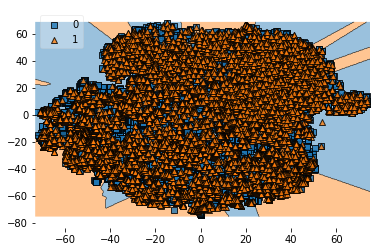

In [27]:
tsne_images = TSNE(n_components=2).fit_transform(normalized_X)
tsne_classifier = MLPClassifier()
print(1)
tsne_classifier.fit(tsne_images, Y)
print(2)
plot_decision_regions(tsne_images, (numpy.asarray(Y)).astype(int), clf = tsne_classifier, legend = 2)

In [ ]:
plot_support_vectors(tsne_images, (numpy.asarray(Y)).astype(int), tsne_classifier)

In [52]:
def plot_support_vectors(X, Y, clf):
    
    cmap_type = plt.cm.Paired
    s_val = 30
    
    plt.scatter(X[:, 0], X[:, 1], s = s_val, c = Y, cmap = cmap_type)

    current_axes = plt.gca()
    xlim = current_axes.get_xlim()
    ylim = current_axes.get_ylim()
    xx = numpy.linspace(xlim[0], xlim[1], s_val)
    yy = numpy.linspace(ylim[0], ylim[1], s_val)
    YY, XX = numpy.meshgrid(yy, xx)
    xy = numpy.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100,
               linewidth = 1, facecolors = 'none', edgecolors = 'k')

    #reference taken from: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html


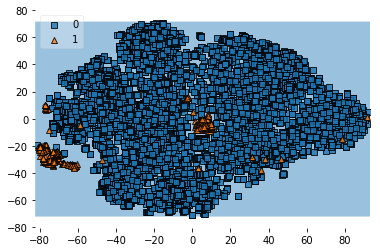

In [215]:
data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Abhi.flac")
data = data[:,0]
hin_mfcc, hin_delta = extract_features(data, samplerate)
data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_sur.flac")
data = data[:,0]
eng_mfcc, eng_delta = extract_features(data, samplerate)

zeros = [0]*len(x_English)

# zeros = [0]*len(eng_mfcc)
eng_mfcc = numpy.array(eng_mfcc)
eng_delta = numpy.array(eng_delta)
# x_English = numpy.concatenate((eng_mfcc, eng_delta), axis = 1)
ones = [1]*len(hin_mfcc)
hin_mfcc = numpy.array(hin_mfcc)
hin_delta = numpy.array(hin_delta)
x_Hindi = numpy.concatenate((hin_mfcc, hin_delta), axis = 1)
# x_Hindi = hin_delta
X = numpy.concatenate((x_English, x_Hindi), axis=0)
Y = numpy.concatenate((zeros, ones), axis=0)
normalized_X = preprocessing.normalize(X)

tsne_images = TSNE(n_components=2).fit_transform(normalized_X)
tsne_classifier = svm.SVC()
tsne_classifier.fit(tsne_images, Y)
plot_decision_regions(tsne_images, (numpy.asarray(Y)).astype(int), clf = tsne_classifier, legend = 2)

In [26]:
audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Hindi_Data_flac\\h2.flac")
print(samplerate)

44100


# Multi Class

In [105]:
top_coder_data = pd.read_csv('C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Data\TopCoder_Data\\trainingData.csv')
top_coder_data = numpy.array(top_coder_data)
languages = top_coder_data[:,1]
files = top_coder_data[:,0]
indices = []
labels = []
language_array = ["Hindi", "Kannada", "Dutch", "Arabic", "Korean South", "Thai"]
count = 0
num = 20
for lang in language_array:
    indices.extend((list(numpy.where(languages == lang)[0]))[:num])
    labels.extend([count]*num)
    count+=1
samples = files[indices]

In [104]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [86]:
picklevar("list_multi_class", list(samples))
print(samples)

['00ywwvulzwa.mp3' '01rjjbm5mtn.mp3' '05uipha1itb.mp3' '0ec1nsncnvc.mp3'
 '0ujcc5vsbnh.mp3' '0wmrtwefmwj.mp3' '1fwa0bfo3vs.mp3' '1mqlurofzcu.mp3'
 '1nc0wjirijz.mp3' '1smbn4j3qry.mp3' '1wifa3dsmpd.mp3' '1yyn1gkhmvf.mp3'
 '23hw2wbqume.mp3' '25cunnkzu0g.mp3' '25ddeltl15h.mp3' '2czq3regbma.mp3'
 '2flc0crdrum.mp3' '2gk23agp2hp.mp3' '2ijrmsw43m1.mp3' '2lx5k3do3uv.mp3'
 '04s5k4sungk.mp3' '0cebfyh553l.mp3' '0d0rfpzewzc.mp3' '0d11h44yzbq.mp3'
 '0gownuh0352.mp3' '0i2qzsozvsp.mp3' '0i5z3orzymc.mp3' '0kdk4yrhoc2.mp3'
 '0tmi5nu21o0.mp3' '0wkm23stttf.mp3' '0wttzps5s0f.mp3' '0xcctu02iyx.mp3'
 '0y3nfdwqfyn.mp3' '1asgpbqmokr.mp3' '1bpexgask0y.mp3' '1cakdsum30k.mp3'
 '1pggijevvem.mp3' '1ykdp4lp5ud.mp3' '22beogjli3c.mp3' '23fjuiialm2.mp3'
 '002sjun3mz4.mp3' '03o2w5wasmc.mp3' '0b1jkzj2vwa.mp3' '0g2m4zrqqll.mp3'
 '0iuzeu3c3m1.mp3' '0mibusabssh.mp3' '0od5miikew4.mp3' '0onk1yz2at3.mp3'
 '0refwq5fada.mp3' '0trqaji54qu.mp3' '0u02qmfyvsj.mp3' '0vor03yd4ma.mp3'
 '0xuelsb3uz2.mp3' '0ycev4cm54n.mp3' '13icwvp20gw.m

In [106]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [126]:
mfcc_features = []
delta_features = []
features = []
label = []
num_iterations = 0

for file in tqdm(samples):
    file = file[:-4] + ".flac"
    audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Multi_Class_flac\\" + file)
    print(file, samplerate)
    audio_mfcc, audio_delta = extract_features(audio_data, samplerate)
    mfcc_features.extend(audio_mfcc)
    delta_features.extend(audio_delta)
    label.extend([labels[num_iterations]]*len(audio_mfcc))
    num_iterations+=1

mfcc_features = numpy.array(mfcc_features)
delta_features = numpy.array(delta_features)
# X = numpy.concatenate((mfcc_features, delta_features)
# Y = label
# normalized_X = preprocessing.normalize(X)

00ywwvulzwa.flac 44100
01rjjbm5mtn.flac 44100
05uipha1itb.flac 44100
0ec1nsncnvc.flac 44100
0ujcc5vsbnh.flac 44100
0wmrtwefmwj.flac 44100
1fwa0bfo3vs.flac 44100
1mqlurofzcu.flac 44100
1nc0wjirijz.flac 44100
1smbn4j3qry.flac 44100
1wifa3dsmpd.flac 44100
1yyn1gkhmvf.flac 44100
23hw2wbqume.flac 44100
25cunnkzu0g.flac 44100
25ddeltl15h.flac 44100
2czq3regbma.flac 44100
2flc0crdrum.flac 44100
2gk23agp2hp.flac 44100
2ijrmsw43m1.flac 44100
2lx5k3do3uv.flac 44100
04s5k4sungk.flac 44100
0cebfyh553l.flac 44100
0d0rfpzewzc.flac 44100
0d11h44yzbq.flac 44100
0gownuh0352.flac 44100
0i2qzsozvsp.flac 44100
0i5z3orzymc.flac 44100
0kdk4yrhoc2.flac 44100
0tmi5nu21o0.flac 44100
0wkm23stttf.flac 44100
0wttzps5s0f.flac 44100
0xcctu02iyx.flac 44100
0y3nfdwqfyn.flac 44100
1asgpbqmokr.flac 44100
1bpexgask0y.flac 44100
1cakdsum30k.flac 44100
1pggijevvem.flac 44100
1ykdp4lp5ud.flac 44100
22beogjli3c.flac 44100
23fjuiialm2.flac 44100
002sjun3mz4.flac 44100
03o2w5wasmc.flac 44100
0b1jkzj2vwa.flac 44100
0g2m4zrqqll

TypeError: 'list' object cannot be interpreted as an integer

In [133]:
mfcc_features = numpy.array(mfcc_features)
delta_features = numpy.array(delta_features)
print(mfcc_features.shape, delta_features.shape)
X = numpy.concatenate((mfcc_features, delta_features), axis=1)
Y = label
normalized_X = preprocessing.normalize(X)
# print(Y)
print(X.shape, len(Y))


(219960, 13) (219960, 13)
(219960, 26) 219960


In [134]:
x_train, x_test, y_train, y_test = train_test_split(normalized_X, Y, test_size = 0.2)

In [103]:
picklevar("normalized_X_multi_class", normalized_X)
picklevar("Y_multi_class", Y)

[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 

In [92]:
for i in range(len(labels)):
    print(labels[i], samples[i])

0 00ywwvulzwa.mp3
0 01rjjbm5mtn.mp3
0 05uipha1itb.mp3
0 0ec1nsncnvc.mp3
0 0ujcc5vsbnh.mp3
0 0wmrtwefmwj.mp3
0 1fwa0bfo3vs.mp3
0 1mqlurofzcu.mp3
0 1nc0wjirijz.mp3
0 1smbn4j3qry.mp3
0 1wifa3dsmpd.mp3
0 1yyn1gkhmvf.mp3
0 23hw2wbqume.mp3
0 25cunnkzu0g.mp3
0 25ddeltl15h.mp3
0 2czq3regbma.mp3
0 2flc0crdrum.mp3
0 2gk23agp2hp.mp3
0 2ijrmsw43m1.mp3
0 2lx5k3do3uv.mp3
1 04s5k4sungk.mp3
1 0cebfyh553l.mp3
1 0d0rfpzewzc.mp3
1 0d11h44yzbq.mp3
1 0gownuh0352.mp3
1 0i2qzsozvsp.mp3
1 0i5z3orzymc.mp3
1 0kdk4yrhoc2.mp3
1 0tmi5nu21o0.mp3
1 0wkm23stttf.mp3
1 0wttzps5s0f.mp3
1 0xcctu02iyx.mp3
1 0y3nfdwqfyn.mp3
1 1asgpbqmokr.mp3
1 1bpexgask0y.mp3
1 1cakdsum30k.mp3
1 1pggijevvem.mp3
1 1ykdp4lp5ud.mp3
1 22beogjli3c.mp3
1 23fjuiialm2.mp3
2 002sjun3mz4.mp3
2 03o2w5wasmc.mp3
2 0b1jkzj2vwa.mp3
2 0g2m4zrqqll.mp3
2 0iuzeu3c3m1.mp3
2 0mibusabssh.mp3
2 0od5miikew4.mp3
2 0onk1yz2at3.mp3
2 0refwq5fada.mp3
2 0trqaji54qu.mp3
2 0u02qmfyvsj.mp3
2 0vor03yd4ma.mp3
2 0xuelsb3uz2.mp3
2 0ycev4cm54n.mp3
2 13icwvp20gw.mp3
2 14acjyez

In [213]:
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Hindi_Data_2\\"):
    audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_2\\" + file)
    print(file, samplerate)

00ywwvulzwa.flac 44100
01rjjbm5mtn.flac 44100
0ec1nsncnvc.flac 44100
0ujcc5vsbnh.flac 44100
0wmrtwefmwj.flac 44100
1fwa0bfo3vs.flac 44100
1mqlurofzcu.flac 44100
1nc0wjirijz.flac 44100
1smbn4j3qry.flac 44100
1wifa3dsmpd.flac 44100
1yyn1gkhmvf.flac 44100
2czq3regbma.flac 44100
2flc0crdrum.flac 44100
2gk23agp2hp.flac 44100
2ijrmsw43m1.flac 44100
2lx5k3do3uv.flac 44100
2msjr3tf3oz.flac 44100
2qw2zhf4bmj.flac 44100
2sgpwo1rstm.flac 44100
2y4j5w5yvgn.flac 44100
2zrgzwzzfid.flac 44100
3emmoabevvf.flac 44100
3fet3eip1g3.flac 44100
3piuebekss2.flac 44100
3q51xcd3ebx.flac 44100
3vkq0ud3ox5.flac 44100
3xuval2d5xf.flac 44100
4aplyhc11dr.flac 44100
4b41wqocpcy.flac 44100
4jdw2v3b2fy.flac 44100
h1.flac 44100
h10.flac 44100
h11.flac 22050
h2.flac 44100
h3.flac 44100
h4.flac 44100
h5.flac 44100
h6.flac 44100
h7.flac 44100
h8.flac 44100
h9.flac 44100
